<a href="https://colab.research.google.com/github/NicolasNevaL/Phyton_Machine_Learning/blob/main/Clasificaci%C3%B3n_de_Noticias_RNNs__LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proposito de aprendizaje
Adquirir habilidades prácticas en el preprocesamiento de datos textuales y en la implementación de modelos avanzados de RNN y LSTM para la clasificación de noticias en categorías especializadas como deportes, cultura, economía y justicia. Al finalizar, los estudiantes habrán desarrollado la capacidad de construir, entrenar y evaluar estos modelos, así como de comparar su rendimiento de manera crítica.

## Producto
Cuaderno Jupyter (Jupyter Notebook): Documentación del proceso completo de preprocesamiento, construcción, entrenamiento, evaluación y comparación de modelos RNN y LSTM.
Informe (PDF/Markdown): Un documento que resuma los hallazgos, compare los modelos RNN y LSTM, y discuta las implicaciones prácticas de los resultados

## Carga y Exploración de Datos

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
from io import BytesIO

In [2]:
!pip install openpyxl

In [3]:
# URL Raw del archivo
url = "https://raw.githubusercontent.com/Izainea/nlp_ean/main/Datos/Datos%20Crudos/Noticias.xlsx"

# Descargar el archivo desde la URL Raw
response = requests.get(url)

# Leer el archivo Excel
df = pd.read_excel(BytesIO(response.content))

In [4]:
print(df.head(5))

   Columna1                                            Enlaces  \
0         0  https://www.eltiempo.com/agresion-contra-un-op...   
1         1  https://www.eltiempo.com/archivo/documento/CMS...   
2         2  https://www.eltiempo.com/archivo/documento/CMS...   
3         3  https://www.eltiempo.com/archivo/documento/CMS...   
4         4  https://www.eltiempo.com/archivo/documento/CMS...   

                                              Título  \
0  Operador de grúa quedó inconsciente tras agres...   
1   Usaquén, primera en infracciones por mal parqueo   
2  'Me atracaron y vi un arma que me heló la sang...   
3  Escoltas mal estacionados, dolor de cabeza de ...   
4  Radicado primer proyecto que autorizaría union...   

                                                info  \
0  El conductor de una moto le lanzó el casco y p...   
1  La localidad ocupa el primer lugar en comparen...   
2  Un ciudadano relata cómo cuatro hombres lo rob...   
3  Las zonas de restaurantes se convierten

In [5]:
## clear nan values of df, other options to dropna df.dropna(subset=['Titulo'])
df=df.dropna()

In [6]:
## describe df['Etiqueta']
print(df['Etiqueta'].describe())
## print unique df['Etiqueta']
print(df['Etiqueta'].unique())

count       11483
unique         24
top       archivo
freq         6988
Name: Etiqueta, dtype: object
['colombia' 'archivo' 'bocas' 'bogota' 'carrusel' 'contenido-comercial'
 'cultura' 'datos' 'deportes' 'economia' 'elecciones' 'especiales'
 'justicia' 'lecturas-dominicales' 'mas-contenido' 'mundial' 'mundo'
 'opinion' 'podcast' 'politica' 'salud' 'tecnosfera'
 'unidad-investigativa' 'vida']


In [7]:
## print distribution of df['Etiquetas']
print(df['Etiqueta'].value_counts())
categories = ['deportes', 'cultura', 'economia', 'justicia', 'salud']

Etiqueta
archivo                 6988
colombia                 919
deportes                 706
mundo                    439
cultura                  412
economia                 363
justicia                 339
bogota                   306
vida                     262
politica                 251
tecnosfera               209
salud                    106
mundial                   41
elecciones                32
unidad-investigativa      27
contenido-comercial       25
podcast                   20
bocas                     15
carrusel                   8
lecturas-dominicales       6
mas-contenido              3
opinion                    2
especiales                 2
datos                      2
Name: count, dtype: int64


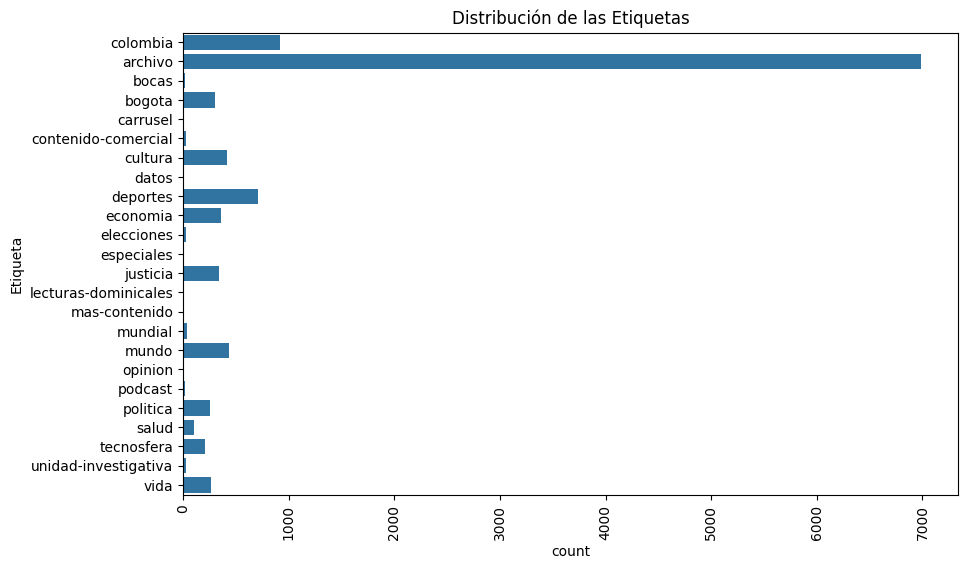

In [8]:
# Visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(df['Etiqueta'])
plt.title('Distribución de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.

In [9]:
## Select specific categories to analyse
categories = ['deportes', 'cultura', 'economia', 'justicia']
df = df[df['Etiqueta'].isin(categories)]

In [10]:
### Count the number of Categories in categories = ['deportes', 'cultura', 'economia', 'justicia']
print(df['Etiqueta'].value_counts())

Etiqueta
deportes    706
cultura     412
economia    363
justicia    339
Name: count, dtype: int64


Note: Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.

## Text pre processing
Objetivo: Preparar los datos textuales para el entrenamiento del modelo.

Acciones:

* Convertir todo el texto a minúsculas para uniformidad.
* Eliminar puntuación y números para reducir el ruido en los datos.
* Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
* Tokenizar el texto, es decir, dividir el texto en palabras individuales.





In [11]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import keras
import tensorflow as tf

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
## Aditional library to fix bug in pre procesamiento
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    return ' '.join(tokens)


In [13]:
# Aplicar preprocesamiento, there are a columns in df that has the name 'contenido'
df['contenido_preprocesado'] = df['contenido'].apply(preprocess_text)

In [14]:
print (df['contenido_preprocesado'])

10487    citas “ crímenes violencia sexual cometidos in...
10488    motivo celebración años enseñanza danza orient...
10489    cuadro busto mujer artista español pablo picas...
10490    carnaval artes organizado barranquilla fundaci...
10491    louise du toit filósofa doctor denis mukwege p...
                               ...                        
12467    ministro defensa carlos holmes trujillo dio co...
12468    después varios contrapunteos mejor manera reso...
12469    tiempo universidad libre aliaron brindarles us...
12470    tres trabajadores edificio portales blas lezo ...
12471    frente alerta prendido procuraduría problemas ...
Name: contenido_preprocesado, Length: 1820, dtype: object


In [15]:
print (df['contenido'])

10487    Citas: “Los crímenes de violencia sexual comet...
10488    Con motivo de la celebración de los 20 años de...
10489    El cuadro Busto de mujer, del artista español ...
10490    El Carnaval de las Artes, organizado en Barran...
10491    Louise du Toit, filósofa; el doctor Denis Mukw...
                               ...                        
12467    El  ministro de la Defensa, Carlos Holmes Truj...
12468    Después de varios contrapunteos sobre la mejor...
12469    El TIempo y la Universidad Libre se aliaron pa...
12470    Tres trabajadores del edificio Portales Blas d...
12471    Frente a la alerta que había prendido la Procu...
Name: contenido, Length: 1820, dtype: object


In [16]:
## Count average leng of words  in df['contenido']
print(df['contenido'].apply(lambda x: len(x.split())).mean())

632.678021978022


In [17]:
## tomar una muestra balanceada de 339 entradas

# Suponiendo que 'df' es tu DataFrame original
categories = ['deportes', 'cultura', 'economia', 'justicia']
num_samples_per_category = 339

# Crear un DataFrame vacío para almacenar la muestra balanceada
balanced_df = pd.DataFrame()

# Iterar sobre las categorías y tomar muestras
for category in categories:
    # Filtrar el DataFrame original por categoría
    category_df = df[df['Etiqueta'] == category]

    # Tomar una muestra aleatoria de 'num_samples_per_category' entradas
    sample = category_df.sample(n=num_samples_per_category, replace=False, random_state=42)  # replace=False para evitar duplicados

    # Agregar la muestra al DataFrame balanceado
    balanced_df = pd.concat([balanced_df, sample])

# Ahora 'balanced_df' contiene una muestra balanceada de 339 entradas
# para cada categoría en 'categories'


In [18]:
print(balanced_df['Etiqueta'].value_counts())

Etiqueta
deportes    339
cultura     339
economia    339
justicia    339
Name: count, dtype: int64


In [25]:
print ((balanced_df['contenido_preprocesado']))

11416    días deportiva aficionados mismos atletas busc...
11008    vida ciclista antioqueño rigoberto urán quebró...
11004    nairo quintana miguel ángel ‘ supermán ’ lópez...
11137    santa fe anunció medidas acuerdos llegó plante...
11252    barcelona ganó getafe goles lionel messi luis ...
                               ...                        
12321    presuntas irregularidades construcción puente ...
12201    consejo negó pretensiones demanda unión tempor...
12236    pablo bustos presidente red veedurías anunció ...
12403    entidades trabajo forma articulada atención ca...
12232    menos mitad ‘ costos fijos operación ’ bandas ...
Name: contenido_preprocesado, Length: 1356, dtype: object


In [22]:
# Tokenizar el texto
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(balanced_df['contenido_preprocesado'])
sequences = tokenizer.texts_to_sequences(balanced_df['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 300  ## Ajust average leng of words in df['contenido']
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

array([[ 138, 2787, 3371, ...,    0,    0,    0],
       [   7, 1325, 1712, ...,    0,    0,    0],
       [1258, 1197,  428, ...,    0,    0,    0],
       [ 213,  275,  540, ...,    0,    0,    0],
       [6507, 6508, 1075, ...,   50,    5,   35]], dtype=int32)

## División del Conjunto de Datos

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
balanced_df['Etiqueta_codificada'] = label_encoder.fit_transform(balanced_df['Etiqueta']) # Use balanced_df instead of df

# División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, balanced_df['Etiqueta_codificada'], test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)

(1084, 272)

Nota: El texto principal de un artículo de periódico suele tener entre 2000 y 3500 palabras, sin incluir el título, resumen, referencias, tablas y figuras

## Red Neuronal Recurrente Simple

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step - accuracy: 0.2707 - loss: 1.4101 - val_accuracy: 0.2721 - val_loss: 1.3933
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.3484 - loss: 1.3391 - val_accuracy: 0.2757 - val_loss: 1.4047
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.3776 - loss: 1.2934 - val_accuracy: 0.3051 - val_loss: 1.4395
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.2590 - loss: 1.4904 - val_accuracy: 0.2574 - val_loss: 1.4115
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.2912 - loss: 1.3797 - val_accuracy: 0.2684 - val_loss: 1.4016
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.2990 - loss: 1.3742 - val_accuracy: 0.2904 - val_loss: 1.3983
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.2726 - loss: 1.3937 - val_accuracy: 0.2684 - val_loss: 1.3924
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.2822 - loss: 1.3900 - val_accuracy: 0.2463 - va

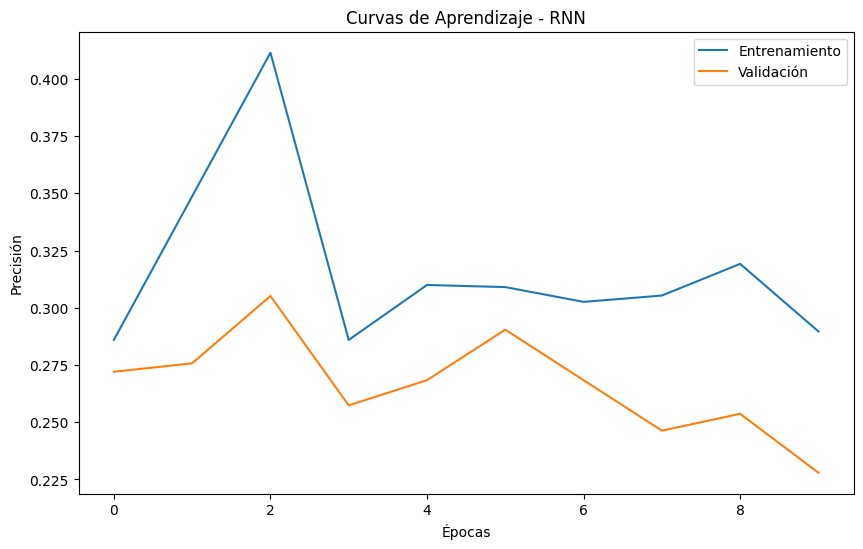

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
## Fijar semilla
np.random.seed(42)
tf.random.set_seed(42)

## Crear la red neuronal
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dense(units=len(categories), activation='softmax'))

# Compilación del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()

In [27]:
from sklearn.metrics import classification_report
import numpy as np

# Predicciones en el conjunto de validación
y_pred_probs = model_rnn.predict(X_val)                  # Predicciones como probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)             # Convertir probabilidades a etiquetas

# Generar el reporte de clasificación
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
print(report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
              precision    recall  f1-score   support

     cultura       0.00      0.00      0.00        78
    deportes       0.23      0.95      0.37        65
    economia       0.00      0.00      0.00        67
    justicia       0.00      0.00      0.00        62

    accuracy                           0.23       272
   macro avg       0.06      0.24      0.09       272
weighted avg       0.06      0.23      0.09       272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Red Simple Long Short Term Memory LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 14s 282ms/step - accuracy: 0.2775 - loss: 1.3842 - val_accuracy: 0.2500 - val_loss: 1.3974
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.2906 - loss: 1.3831 - val_accuracy: 0.2684 - val_loss: 1.3900
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 0.2879 - loss: 1.3759 - val_accuracy: 0.2684 - val_loss: 1.3905
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.2890 - loss: 1.3759 - val_accuracy: 0.2500 - val_loss: 1.3906
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.2912 - loss: 1.3758 - val_accuracy: 0.2500 - val_loss: 1.3906
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.2912 - loss: 1.3756 - val_accuracy: 0.2500 - val_loss: 1.3906
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.2912 - loss: 1.3755 - val_accuracy: 0.2500 - val_loss: 1.3905
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.2912 - loss: 1.3754 - val_accuracy: 0.2500 -

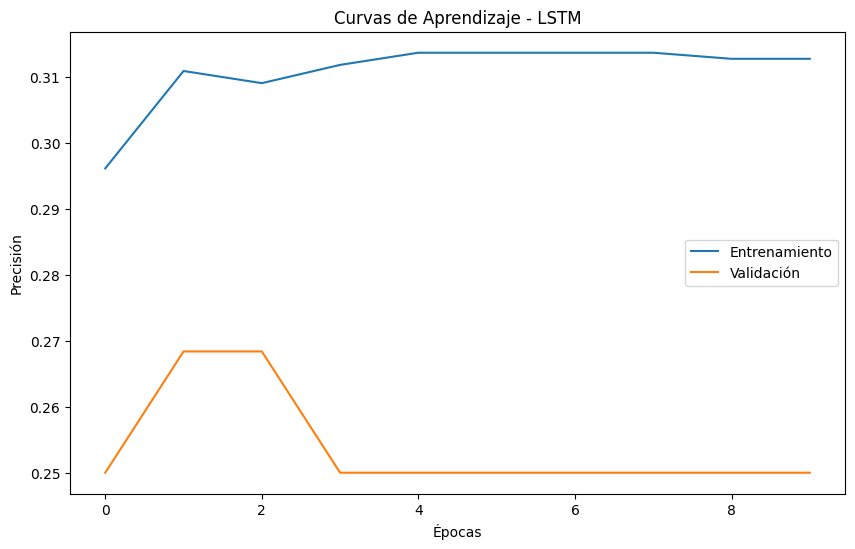

In [28]:
from keras.layers import LSTM

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(units=64, return_sequences=False))
model_lstm.add(Dense(units=len(categories), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()

In [29]:
from sklearn.metrics import classification_report
import numpy as np

# Predicciones en el conjunto de validación
y_pred_probs = model_lstm.predict(X_val)                  # Predicciones como probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)             # Convertir probabilidades a etiquetas

# Generar el reporte de clasificación
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
print(report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
              precision    recall  f1-score   support

     cultura       0.00      0.00      0.00        78
    deportes       0.27      0.60      0.38        65
    economia       0.00      0.00      0.00        67
    justicia       0.22      0.47      0.30        62

    accuracy                           0.25       272
   macro avg       0.12      0.27      0.17       272
weighted avg       0.12      0.25      0.16       272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Comparación y análisis

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00        78
     cultura       0.23      0.95      0.37        65
    economia       0.00      0.00      0.00        67
    justicia       0.00      0.00      0.00        62

    accuracy                           0.23       272
   macro avg       0.06      0.24      0.09       272
weighted avg       0.06      0.23      0.09       272

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00        78
     cultura       0.27      0.60      0.38        65
    economia       0.00      0.00      0.00        67
    justicia       0.22      0.47      0.30        62

    accuracy                           0.25       272
   macro avg       0.12      0.27      0.17       272
weighted avg       0.12      0.25      0.16       272



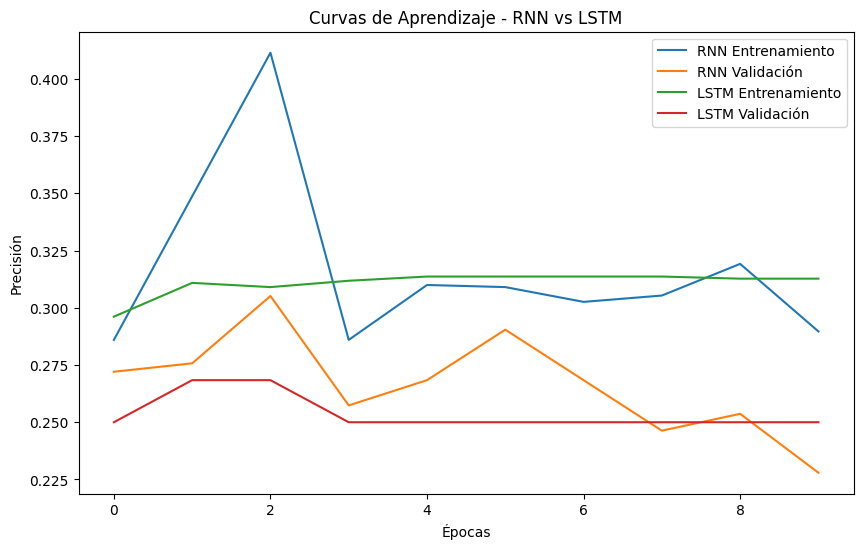

In [30]:
from sklearn.metrics import classification_report

# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = model_lstm.predict(X_val).argmax(axis=1)

# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categories)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categories)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validación')
plt.plot(history_lstm.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()

## Red Neuronal Recurrente Profunda

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Definir hiperparámetros
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300
rnn_units = 128
num_classes = len(label_encoder.classes_)
max_len = 300
                             # Longitud máxima de las secuencias

# Construcción del modelo RNN (Con tres capas)
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(rnn_units, activation='tanh', return_sequences=True),  ## Capa RNN básica
    Dropout(0.2),
    # Second LSTM layer
    SimpleRNN(rnn_units, activation='tanh', return_sequences=True), ## Segunda capa RNN
    Dropout(0.2),
    SimpleRNN(rnn_units, activation='tanh',  return_sequences=False),  ## Tercera Capa
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Capa de salida para clasificación
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),                         # Optimizador
    loss=SparseCategoricalCrossentropy(),                       # Función de pérdida
    metrics=[SparseCategoricalAccuracy(name='accuracy')]        # Métricas de evaluación
)

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,                                           # Datos de entrenamiento
    validation_data=(X_val, y_val),                             # Datos de validación
    epochs=15,                                                  # Número de épocas
    batch_size=32,                                              # Tamaño del batch
    verbose=1                                                   # Mostrar progreso
)

# Evaluación del modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Pérdida en validación: {loss:.4f}")
print(f"Precisión en validación: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 669ms/step - accuracy: 0.2586 - loss: 1.6710 - val_accuracy: 0.2868 - val_loss: 1.3859
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 609ms/step - accuracy: 0.2344 - loss: 1.5567 - val_accuracy: 0.2721 - val_loss: 1.4008
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 635ms/step - accuracy: 0.2248 - loss: 1.5441 - val_accuracy: 0.2390 - val_loss: 1.4587
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 681ms/step - accuracy: 0.2471 - loss: 1.5033 - val_accuracy: 0.2390 - val_loss: 1.4461
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 666ms/step - accuracy: 0.2362 - loss: 1.5492 - val_accuracy: 0.2978 - val_loss: 1.4187
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 697ms/step - accuracy: 0.2515 - loss: 1.5053 - val_accuracy: 0.2390 - val_loss: 1.4260
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 617ms/step - accuracy: 0.2610 - loss: 1.5046 - val_accuracy: 0.2316 - val_loss: 1.4488
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 664ms/step - accuracy: 0.2447 - loss: 1.5099 - val_accu

In [38]:
from sklearn.metrics import classification_report
import numpy as np

# Predicciones en el conjunto de validación
y_pred_probs = model.predict(X_val)                  # Predicciones como probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)             # Convertir probabilidades a etiquetas

# Generar el reporte de clasificación
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
print(report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step
              precision    recall  f1-score   support

     cultura       0.00      0.00      0.00        78
    deportes       0.24      0.80      0.37        65
    economia       0.30      0.25      0.28        67
    justicia       0.00      0.00      0.00        62

    accuracy                           0.25       272
   macro avg       0.14      0.26      0.16       272
weighted avg       0.13      0.25      0.16       272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Red profunda Long Short Term Memory (LSTM)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 601ms/step - accuracy: 0.2546 - loss: 1.3856 - val_accuracy: 0.2647 - val_loss: 1.3899
Epoch 2/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 593ms/step - accuracy: 0.2832 - loss: 1.3813 - val_accuracy: 0.2500 - val_loss: 1.3869
Epoch 3/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 632ms/step - accuracy: 0.2912 - loss: 1.3776 - val_accuracy: 0.2684 - val_loss: 1.3892
Epoch 4/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 624ms/step - accuracy: 0.2870 - loss: 1.3754 - val_accuracy: 0.2500 - val_loss: 1.3915
Epoch 5/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 618ms/step - accuracy: 0.2890 - loss: 1.3758 - val_accuracy: 0.2684 - val_loss: 1.3904
Epoch 6/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 583ms/step - accuracy: 0.2870 - loss: 1.3743 - val_accuracy: 0.2500 - val_loss: 1.3911
Epoch 7/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 617ms/step - accuracy: 0.2981 - loss: 1.3749 - val_accuracy: 0.2500 - val_loss: 1.3909


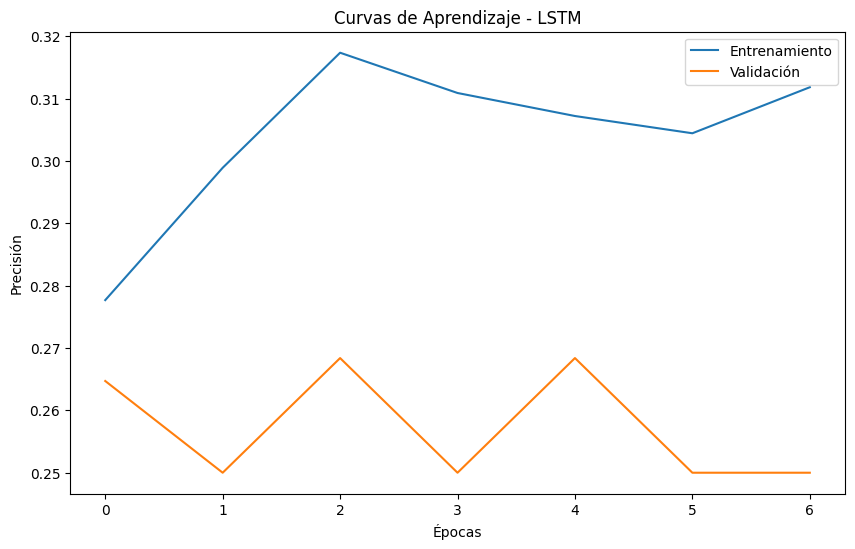

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.layers import LSTM


# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(units=64, return_sequences=True)) ## Primera capa Lstm
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=64, activation='relu', return_sequences=True)) ## Segunda capa Lstm
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=64, activation='relu', return_sequences=False)) ## Tercera capa Lstm
model_lstm.add(Dense(units=len(categories), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=7, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()

## Comparación de Modelos y análisis de resultados

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00        78
     cultura       0.23      0.95      0.37        65
    economia       0.00      0.00      0.00        67
    justicia       0.00      0.00      0.00        62

    accuracy                           0.23       272
   macro avg       0.06      0.24      0.09       272
weighted avg       0.06      0.23      0.09       272

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00        78
     cultura       0.28      0.58      0.37        65
    economia       0.00      0.00      0.00        67
    justicia       0.22      0.48      0.31        62

    accuracy                           0.25       272
   macro avg       0.12      0.27      0.17       272
weighted avg       0.12      0.25      0.16       272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

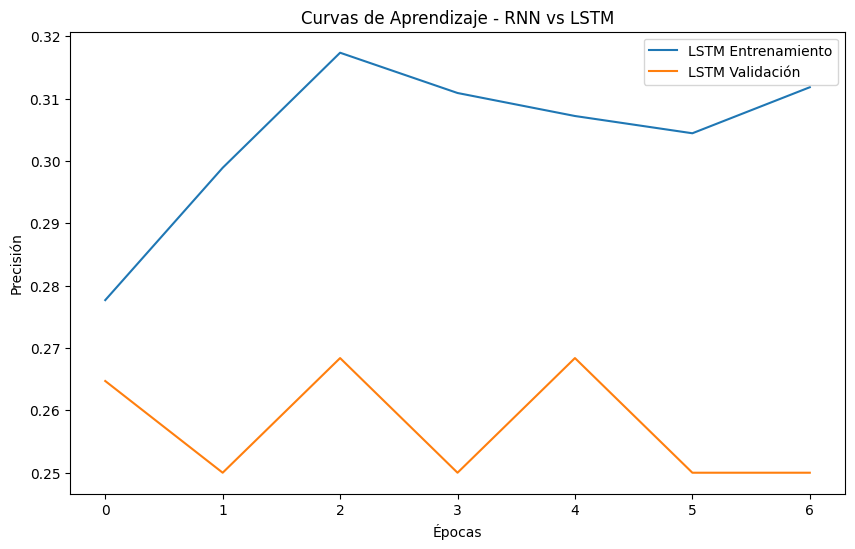

In [36]:
from sklearn.metrics import classification_report

# Evaluar modelos en el conjunto de validación
# y_pred_rnn = model.predict(X_val).argmax(axis=1) # RNN
y_pred_lstm = model_lstm.predict(X_val).argmax(axis=1) # LSTM

# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categories)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categories)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualización de resultados
plt.figure(figsize=(10, 6))
#plt.plot(history.history['accuracy'], label='RNN Entrenamiento')
#plt.plot(history.history['val_accuracy'], label='RNN Validación')
plt.plot(history_lstm.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()

## Conclusiones y recomendaciones
* Resumir las principales conclusiones de la comparación
entre los modelos RNN y LSTM.
* Proporcionar recomendaciones para mejorar el rendimiento de los modelos o explorar enfoques alternativos.
* Discutir las implicaciones prácticas de los resultados y cómo podrían aplicarse en un contexto real.

#### Clonclusiones de los ejercicios
1. Los primeros modelos que se ejecutaron de redes neuronales simples y redes LSTM, tuvieron  los resultados esperados luego de varias ejecuciones de los modelos

2. Luego de intentar mejorar los modelos, aumentando en número de épocas de entrenamiento y agregando capas. La RNN profunda capturó otra variable de clasificación adicional, posiblemente porque le faltan épocas de entrenamiento al modelo o muestras balanceadas